<a href="https://colab.research.google.com/github/arundhakal10/AI/blob/main/Copy_of_Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Iris Flower Classification using Machine Learning Algorithms

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#df=pd.read_csv('/content/drive/MyDrive/Datasets/irisDataset.csv')
df=pd.read_csv('https://raw.githubusercontent.com/binoddshah/AIDataset/main/irisDataset.csv')

In [ ]:
df.isnull().sum()

sepal length (cm)     0
sepal width (cm)     30
petal length (cm)    68
petal width (cm)      0
Class                 0
dtype: int64

In [ ]:
df.shape

(150, 5)

#Replacing null values using mean

In [ ]:
for i in list(df.columns):
  if(df[i].isnull().sum()>0):
    df[i].replace(np.nan,df[i].mean(),inplace=True)

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-Setosa
1,4.9,3.0,1.4,0.2,Iris-Setosa
2,4.7,3.2,1.3,0.2,Iris-Setosa
3,4.6,3.1,1.5,0.2,Iris-Setosa
4,5.0,NaN,1.4,0.2,Iris-Setosa
...,...,...,...,...,...
145,6.7,3.0,NaN,2.3,Iris-Virginica
146,6.3,2.5,5.0,1.9,Iris-Virginica
147,6.5,3.0,5.2,2.0,Iris-Virginica
148,6.2,NaN,5.4,2.3,Iris-Virginica


In [ ]:
df[['Class']]

,Class
0,Iris-Setosa
1,Iris-Setosa
2,Iris-Setosa
3,Iris-Setosa
4,Iris-Setosa
...,...
145,Iris-Virginica
146,Iris-Virginica
147,Iris-Virginica
148,Iris-Virginica


In [ ]:
df.Class.unique()

array(['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Class=le.fit_transform(df.Class)

In [ ]:
df[['Class']]

,Class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
import matplotlib.pyplot as plt

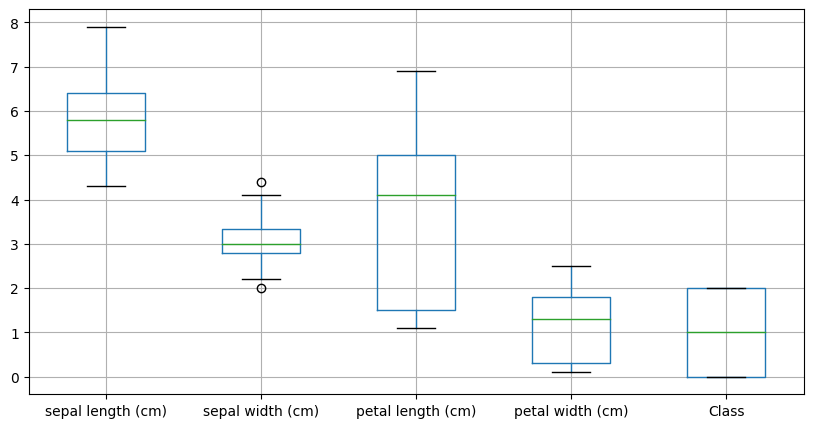

In [ ]:
df.boxplot(figsize=(10,5))
plt.show()

In [ ]:
import plotly.express as px
fig=px.box(df,x=['sepal length (cm)'],y=df['Class'],points='all')
fig.show()

In [ ]:
for i in df.columns:
  #print(f'Feature Name : {i}\n')
  fig=px.box(df,x=df[i],y=df.Class,points='all')
  fig.show()

In [ ]:
q1=df['sepal width (cm)'].quantile(0.25)
q3=df['sepal width (cm)'].quantile(0.75)
iqr=q3-q1
u=q3+1.5*iqr
l=q1-1.5*iqr
df['sepal width (cm)']=np.clip(df['sepal width (cm)'],l,u)

In [ ]:
fig=px.box(df,x=df['sepal width (cm)'],y=df.Class,points='all')
fig.show()

<Axes: >

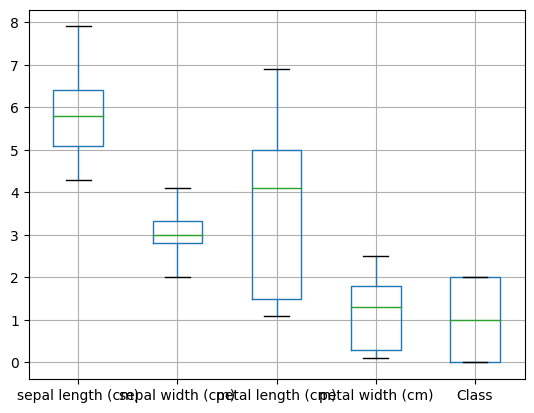

In [ ]:
df.boxplot()

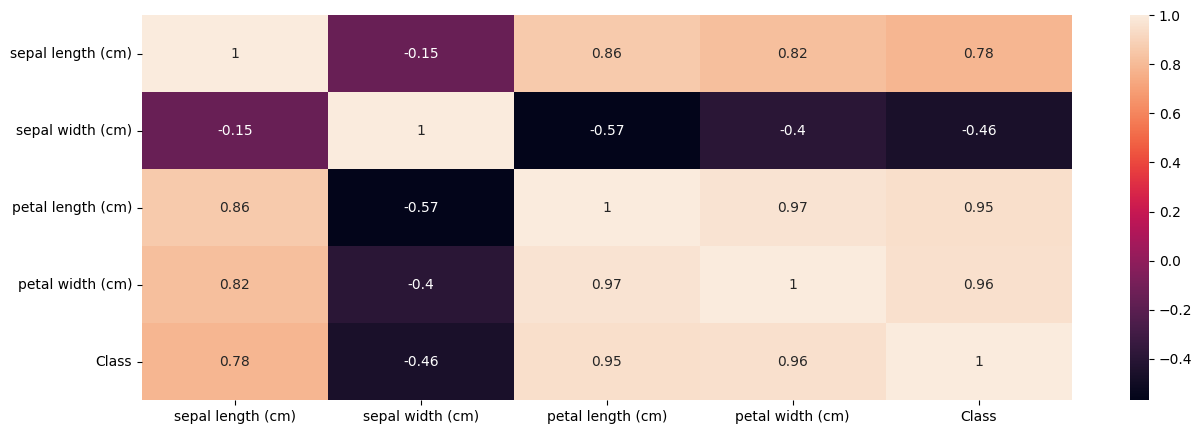

In [ ]:
import seaborn as sns
corr=df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
x=df.drop('Class',axis=1)
y=df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
models=[]
models.append(('Logistic Regression',LogisticRegression()))
models.append(('Decision Tree',DecisionTreeClassifier()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('SVC',SVC(gamma='auto')))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Naive Bayes',GaussianNB()))

In [ ]:
per={'Model Name':[],'Accuracy':[],'Standard Deviation':[]}
for name,model in models:
  kfold=KFold(n_splits=10)
  cross_val_sc=cross_val_score(model,x,y,scoring='accuracy',cv=kfold)
  per['Model Name'].append(name)
  per['Accuracy'].append(np.round(cross_val_sc.mean()*100,4))
  per['Standard Deviation'].append(np.round(cross_val_sc.std(),4))

In [ ]:
result=pd.DataFrame(per)

In [ ]:
result

,Model Name,Accuracy,Standard Deviation
0,Logistic Regression,89.3333,0.0998
1,Decision Tree,93.3333,0.0516
2,Random Forest,96.6667,0.0447
3,SVC,93.3333,0.1033
4,KNN,90.0000,0.0955
5,Naive Bayes,93.3333,0.0730


In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[7 0 0]
 [0 8 4]
 [0 3 8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.73      0.67      0.70        12
           2       0.67      0.73      0.70        11

    accuracy                           0.77        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.77      0.77      0.77        30



In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 78.9 MB/s eta 0:0

https://pycaret.gitbook.io/docs/

In [ ]:
import pycaret
from pycaret.classification import *
s=setup(df,target='Class',session_id=123)


,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(150, 5)"
4,Transformed data shape,"(150, 5)"
5,Transformed train set shape,"(105, 5)"
6,Transformed test set shape,"(45, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9718,0.9909,0.9718,0.9743,0.9715,0.9573,0.9587,0.2500
rf,Random Forest Classifier,0.9627,0.9895,0.9627,0.9670,0.9623,0.9436,0.9460,0.7380
qda,Quadratic Discriminant Analysis,0.9627,0.9948,0.9627,0.9731,0.9611,0.9436,0.9499,0.1300
xgboost,Extreme Gradient Boosting,0.9627,0.9935,0.9627,0.9731,0.9611,0.9436,0.9499,0.1140
dt,Decision Tree Classifier,0.9618,0.9714,0.9618,0.9668,0.9612,0.9422,0.9448,0.1340
gbc,Gradient Boosting Classifier,0.9536,0.9836,0.9536,0.9598,0.9531,0.9298,0.9334,0.6450
lda,Linear Discriminant Analysis,0.9536,0.9948,0.9536,0.9696,0.9487,0.9298,0.9402,0.1330
nb,Naive Bayes,0.9445,0.9868,0.9445,0.9489,0.9441,0.9161,0.9185,0.1080
lightgbm,Light Gradient Boosting Machine,0.9436,0.9890,0.9436,0.9578,0.9384,0.9142,0.9239,0.2780
lr,Logistic Regression,0.9355,0.9883,0.9355,0.9416,0.9352,0.9026,0.9061,1.9630


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
pred_holdout=predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9778,0.9919,0.9778,0.9792,0.9778,0.9667,0.9674


In [ ]:
save_model(best,'best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sepal length (cm)',
                                              'sepal width (cm)',
                                              'petal length (cm)',
                                              'petal width (cm)'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
             